## MSDS 432 - Programming Assignment #4 Dan Avni

## Executive Summary

The purpose of this programming assignment is to provide a "real-world" demonstration of the runtime performance of four sorting algorithms: selection sort, insertion sort, quicksort and merge sort. 

The $\Theta(n)$ and $O(n)$ notation captures the average-case and worst-case performance of that these algorithms respectively:

| Algorithm  | Average-Case $\Theta(n)$  | Worst-Case $\Omega(n)$  |
|-------------|:-------------:|-----|
| Selection Sort  |$\Theta(n^2)$ | $O(n^2)$ |   
| Insertion Sort  |$\Theta(n^2)$ | $O(n^2)$ |  
| Merge Sort      |$\Theta(nlogn)$ | $O(nlogn)$ |
| Quicksort       |$\Theta(nlogn)$ | $O(n^2)$ |

We show that in practical terms the quicksort and merge sort algorithm delivered near identical runtime performance. We also look at the worst-case perofmrance to show how the table turn and merge delivering a demonstrtable superior performance. Actual implementation considerations should include memeory and access time considerations. 

Overall, both merge sort and quicksort should be considered as good options for sorting large datasets, while selection and insertion sort are only useful for east of implementation against smaller data.

## Method and Conclusions

To demonstrate the various sort algorithm average-case performance, we prepared 1000 data elements consisting of a tuple of first name, last name, and state code selected randomly with no repetition or order.

We sort the data 25 times using each of the four algorithms and measure the mean runtime performance. We show the results in both tabular and bar chart for and confirm the therotical results. 

We repeat the excercise with the data sorted in descending order to demonstrate the worst-case performance of quicksort and mergesort.

The below chart shows the avergae case results.

<img src="./runtime2.png">

## Implementation

In [253]:
#import required packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time
import string
import random

In [254]:
# selection sort implemntation retrieved from:
# https://github.com/egonSchiele/grokking_algorithms/blob/master/02_selection_sort/python/01_selection_sort.py

# Finds the smallest value in an array
def findSmallest(arr):
  # Stores the smallest value
  smallest = arr[0]
  # Stores the index of the smallest value
  smallest_index = 0
  for i in range(1, len(arr)):
    if arr[i] < smallest:
      smallest_index = i
      smallest = arr[i]      
  return smallest_index

# Sort array
def selectionSort(arr):
  newArr = []
  for i in range(len(arr)):
      # Finds the smallest element in the array and adds it to the new array
      smallest = findSmallest(arr)
      newArr.append(arr.pop(smallest))
  return newArr

In [255]:
# quick sort implemntation retrieved from:
# https://github.com/egonSchiele/grokking_algorithms/blob/master/04_quicksort/python/05_quicksort.py

def quicksort(array):
  if len(array) < 2:
    # base case, arrays with 0 or 1 element are already "sorted"
    return array
  else:
    # recursive case
    pivot = array[0]
    # sub-array of all the elements less than the pivot
    less = [i for i in array[1:] if i <= pivot]
    # sub-array of all the elements greater than the pivot
    greater = [i for i in array[1:] if i > pivot]
    return quicksort(less) + [pivot] + quicksort(greater)

In [256]:
# insertion sort implementation based on pseducode from https://en.wikipedia.org/wiki/Insertion_sort

def insertionSort(array):
    i = 1
    while i < len(array):
        j = i
        while j > 0 and array[j-1] > array[j]:
            array[j], array[j-1] = array[j-1], array[j]
            j = j - 1
        i = i + 1
    return array

In [271]:
# merge sort implementation - coded by the author using hands on keyboard. More 

def mergeSort(array):
    l = len(array)
    # base case of one element - no work needed
    if l < 2:
        return array
    #split the array to two and sort recursively
    mid = l//2
    array1 = mergeSort(array[:mid])
    array2 = mergeSort(array[mid:])
    
    i, i1, i2, l1, l2 = 0, 0, 0, len(array1), len(array2)
    #merge the two array using one index for each sub-array
    while i < l:
        if i1 < l1 and (i2 == l2 or array1[i1] < array2[i2]):
            array[i] = array1[i1]
            i1 = i1 + 1
        else:
            array[i] = array2[i2]
            i2 = i2 + 1
        i = i1 + i2
    return array

In [272]:
#unit test validation of the selection sort implementation
array = ['a', 'za', 'c', 'zz', '0', '5', '-12','@','asds']

print(selectionSort(array.copy()))
print(insertionSort(array.copy()))
print(quicksort(array.copy()))
print(mergeSort(array.copy()))

['-12', '0', '5', '@', 'a', 'asds', 'c', 'za', 'zz']
['-12', '0', '5', '@', 'a', 'asds', 'c', 'za', 'zz']
['-12', '0', '5', '@', 'a', 'asds', 'c', 'za', 'zz']
['-12', '0', '5', '@', 'a', 'asds', 'c', 'za', 'zz']


In [273]:
state_codes = \
    [
    'AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA',
    'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 
    'ME', 'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 
    'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 
    'SD', 'TN', 'TX', 'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY'
    ]

In [274]:
# generate random data
test_data = []
for i in range(0,1000):
    first_name = ''.join(random.choices(string.ascii_letters, k = 10)) 
    last_name  = ''.join(random.choices(string.ascii_letters, k = 10)) 
    state_code = state_codes[np.random.randint(0,49)]
    test_data.append((first_name, last_name, state_code))
    
#ensure unique values
uniq_dict = {}
for item in test_data:
    if item in uniq_dict:
        raise Exception("test_data is not unique")
    uniq_dict[item] = 'found'

In [287]:
sort_methods = [insertionSort, quicksort, mergeSort, selectionSort]

#prepare an empty data frame with the desired column names
test_results_col_names = ['sort_method', 'sort_ms']
test_results           = pd.DataFrame(columns = test_results_col_names) 

#iterate over the possible sort methods compture runtime length in milliseconds
for i in range(0,25):
    for sort_method in sort_methods:
            start   = time.time()
            data    = sort_method(test_data.copy())
            sort_ms = (time.time() - start) * 1000
            #insert the results into a new dataframe record 
            test_results.loc[len(test_results)] = [sort_method.__name__, sort_ms]

In [288]:
test_results_mean = test_results.groupby(['sort_method'])['sort_ms'].mean().to_frame()

Below is a tabular representation of the test data. It is useful as the charts fail to show the minute fluctuations in the binary search performance. To get a true read of the binary search performance we will need to run multiple tests and average the results, as well as increase the size. We should also try to execute the code in a virtualized environment where the CPU is under competition from other processes.

In [289]:
#plain text data dump of the test results
test_results_mean

,sort_ms
sort_method,
insertionSort,83.727837
mergeSort,3.052092
quicksort,2.718115
selectionSort,43.277531


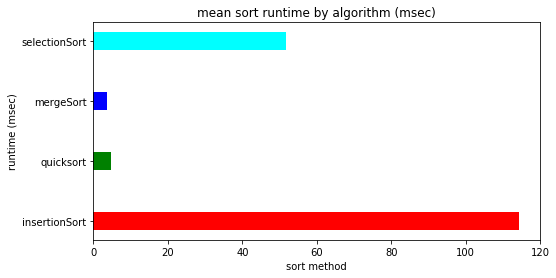

In [290]:
#plot the binary and linear search results against the data length
plt.figure(figsize=(8,4))

plt.barh(test_results.sort_method, test_results.sort_ms, height=0.3, color=['red', 'green', 'blue', 'cyan'])

plt.xlabel('sort method')
plt.ylabel('runtime (msec)')
plt.title('mean sort runtime by algorithm (msec)')
plt.show()

## Worst-Case Test Scenario

Let's look at worst case performance of quicksort versus merge sort, demonstrating how the worst case behavior of merge sort is $O(log n)$ while quicksort degrades to $O(n^2)$.

We accomplish this by sorting the input in descending order prior to invoking each respective algorithm.

In [265]:
sort_methods = [mergeSort, quicksort]

#prepare an empty data frame with the desired column names
test_results_col_names = ['sort_method', 'sort_ms']
test_results           = pd.DataFrame(columns = test_results_col_names) 

#iterate over the possible sort methods compture runtime length in milliseconds
for i in range(0,25):
    for sort_method in sort_methods:
            test_data_copy = sorted(test_data, reverse=True)
            start   = time.time()
            data    = sort_method(test_data_copy)
            sort_ms = (time.time() - start) * 1000
            #insert the results into a new dataframe record 
            test_results.loc[len(test_results)] = [sort_method.__name__, sort_ms]

In [266]:
test_results_mean = test_results.groupby(['sort_method'])['sort_ms'].mean().to_frame()

Below is a tabular representation of the test results data.

In [267]:
#plain text data dump of the test results
test_results_mean

,sort_ms
sort_method,
mergeSort,3.110199
quicksort,88.794670


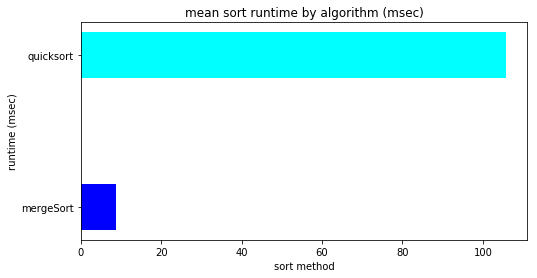

In [268]:
#plot the binary and linear search results against the data length
plt.figure(figsize=(8,4))

plt.barh(test_results.sort_method, test_results.sort_ms, height=0.3, color=['blue', 'cyan'])

plt.xlabel('sort method')
plt.ylabel('runtime (msec)')
plt.title('mean sort runtime by algorithm (msec)')
plt.show()